In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

#for reproducibility
np.random.seed(15)

#for modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation, Flatten, Dropout

from keras.layers import Conv2D, MaxPooling2D

#classification metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score


In [63]:
from google.colab import drive                #Mounting with google drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [64]:
X = np.load('/content/gdrive/MyDrive/Numpy_array/X_train.npy')
y = np.load('/content/gdrive/MyDrive/Numpy_array/TRAIN_Y.npy')

X_test = np.load('/content/gdrive/MyDrive/Numpy_array/X_test.npy')
y_test = np.load('/content/gdrive/MyDrive/Numpy_array/TEST_Y.npy')

In [65]:
y = [1 if label == 'rep' else 0 for label in y ]

In [66]:
y_test = [1 if label == 'rep' else 0 for label in y_test ]

In [67]:
X = np.array(X)
y = np.array(y)

#make sure data are all float to prevent any errors when we feed it into machine
X = X.astype('float32')

#scale the data
#X /= 255

In [68]:
#let's spilt our train dataset into train and val
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.1) 

print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)

print("Shape of X_val: ",X_val.shape)
print("Shape of y_val: ",y_val.shape)

Shape of X_train:  (11976, 150, 150, 3)
Shape of y_train:  (11976,)
Shape of X_val:  (1331, 150, 150, 3)
Shape of y_val:  (1331,)


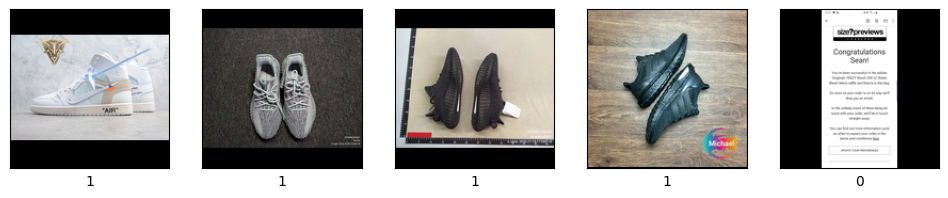

In [69]:
plt.figure(figsize=(12,12))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])

In [71]:
# model body
cnn = Sequential()

#1st convolution layer
cnn.add(Conv2D(filters = 32, kernel_size = 3,
               activation = 'relu', input_shape = (150,150,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))

#2nd convolution layer
cnn.add(Conv2D(filters = 64, kernel_size = 3,
               activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))

#3rd convolution layer
cnn.add(Conv2D(filters = 64, kernel_size = 3,
               activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (2,2)))

cnn.add(Flatten())

cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(64,activation = 'relu'))
cnn.add(Dropout(0.5))

#output layer for binary classification
cnn.add(Dense(1,activation = 'sigmoid'))

In [72]:
cnn.compile(loss = 'binary_crossentropy',
           optimizer = 'adam',
           metrics = ['accuracy'])

In [75]:
%%time

#train model
cnn_history = cnn.fit(X_train, y_train, 
                      validation_data = (X_val, y_val),
                      batch_size = 64,
                      epochs = 10,
                      verbose = 1,
                     )

Epoch 1/10
188/188 [==============================] - 8s 43ms/step - loss: 0.2308 - accuracy: 0.9048 - val_loss: 0.5984 - val_accuracy: 0.7708
Epoch 2/10
188/188 [==============================] - 7s 39ms/step - loss: 0.1897 - accuracy: 0.9242 - val_loss: 0.6769 - val_accuracy: 0.7746
Epoch 3/10
188/188 [==============================] - 8s 41ms/step - loss: 0.1648 - accuracy: 0.9359 - val_loss: 0.7408 - val_accuracy: 0.7821
Epoch 4/10
188/188 [==============================] - 7s 39ms/step - loss: 0.1516 - accuracy: 0.9398 - val_loss: 0.8084 - val_accuracy: 0.7708
Epoch 5/10
188/188 [==============================] - 7s 39ms/step - loss: 0.1315 - accuracy: 0.9478 - val_loss: 0.8307 - val_accuracy: 0.7776
Epoch 6/10
188/188 [==============================] - 7s 39ms/step - loss: 0.1161 - accuracy: 0.9552 - val_loss: 0.8770 - val_accuracy: 0.7844
Epoch 7/10
188/188 [==============================] - 7s 39ms/step - loss: 0.1074 - accuracy: 0.9607 - val_loss: 0.9549 - val_accuracy: 0.7671

In [80]:
cnn.save("model_classifier2",save_format="h5")

In [76]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

ValueError: ignored

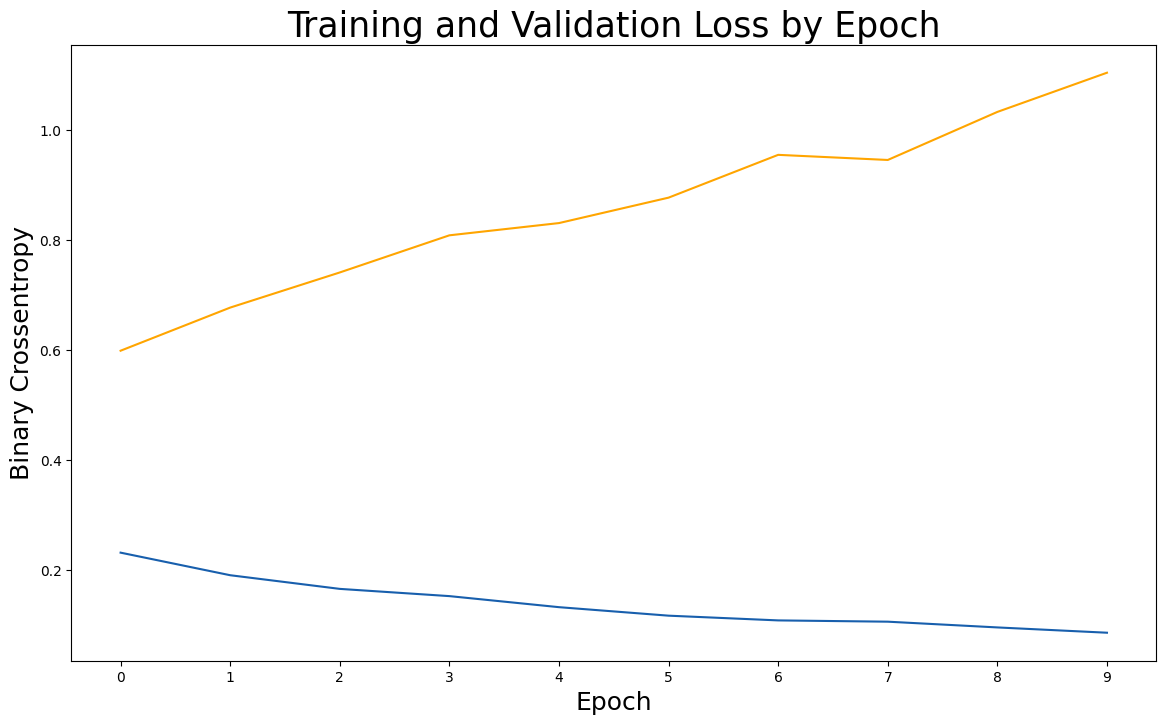

In [96]:
#visualise our losses here
train_loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

# Set figure size.
plt.figure(figsize=(14, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(val_loss, label='Validation Loss', color='orange')

# Set title
plt.title('Training and Validation Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks([ i for i in range(10)],
           [i for i in range(1,9)])

plt.legend(fontsize = 18)

In [77]:
preds = [round(x[0]) for x in cnn.predict(X_test)]
preds_proba = [x[0] for x in cnn.predict(X_test)]

preds_df = pd.DataFrame(list(zip(y_test,preds,preds_proba)), columns = ['actual','preds','preds_proba'])
preds_df.head(10)

47/47 [==============================] - 0s 8ms/step


,actual,preds,preds_proba
0,1,1,9.996233e-01
1,1,1,9.951617e-01
2,1,1,9.981083e-01
3,1,1,9.999588e-01
4,0,0,1.591841e-01
5,1,1,9.959671e-01
6,0,0,1.497449e-07
7,1,1,9.819043e-01
8,1,1,7.956808e-01
9,0,0,9.259542e-04


In [78]:
cm = confusion_matrix(y_test,preds)
cm_df = pd.DataFrame(cm, columns = ['pred_rep','pred_auth'],
                     index=['actual_rep','actual_auth']) 
cm_df

,pred_rep,pred_auth
actual_rep,398,210
actual_auth,159,712


In [79]:
TP, TN, FP, FN = cm[0,0], cm[1,1], cm[1,0], cm[0,1]
precision = TP/(TP+FP)
print(f'Precision: {precision}')

Precision: 0.7145421903052065


In [1]:
from tensorflow import keras

In [2]:
from keras.models import load_model


In [4]:
v=load_model('model_classifier')

In [89]:
path = 'adidas_org.jpg'

In [29]:
from PIL import Image
import numpy as np

In [90]:
im = Image.open(path) 

In [91]:
org_size = im.size                                              #get current image size
ratio = float(150)/max(org_size)                      #calculate aspect ratio
new_size = tuple([int(x * ratio) for x in org_size])            #calculate new size

new_im = im.convert(mode='RGB')                                 #ensure all images are RGB
new_im = new_im.resize(new_size, Image.LANCZOS)                 #resize to new size

canvas = Image.new("RGB", (150, 150))       #create empty image to paste on
canvas.paste(new_im, ((150-new_size[0])//2,           #padding
                         (150-new_size[1])//2))

    

In [98]:
img_arr_d2 = np.array(canvas)

In [101]:
type(img_arr_d2)

numpy.ndarray

In [54]:
img_arr_det.append(img_arr_d2)

In [58]:
len(img_arr_det)

151

In [102]:
img_arr_d2 = img_arr_d2.astype('float32')
img_arr_d2/=255

In [41]:
img_arr_det.shape

(150, 150, 3)

In [35]:
img_arr_det = img_arr_det[..., np.newaxis]

In [103]:
img_arr_d2 = np.expand_dims(img_arr_d2, axis=0)

In [104]:
p=cnn.predict(img_arr_d2)

1/1 [==============================] - 0s 19ms/step


In [110]:
k=p[0][0]

In [114]:
type(round(k))

int